In [26]:
import networkx as nx
from hashi import print_solution
from matplotlib import pyplot as plt
from src.bridges_gen import generate_bridges
from src.graph_utils import puzzle_to_graph
from src.bridges_utils import convert_to_hashi_format
from matplotlib.patches import FancyArrowPatch

In [31]:
def plot_graph(G: nx.Graph, figsize=(5, 5), curve_rad=0.05):
    """
    Plot a NetworkX graph with nodes and edges displaying their 'n' attribute.
    
    Assumes:
    - Each node has an 'n' attribute
    - Each edge has an 'n' attribute
    - Node IDs are tuples (x, y) representing coordinates, OR nodes have 'x' and 'y' attributes
    
    Args:
        G: NetworkX graph
        figsize: Figure size tuple
        curve_rad: Curvature radius for edges (0 = straight, higher = more curved)
    """
    # Assert that all nodes and edges have 'n' attribute
    for node in G.nodes():
        assert 'n' in G.nodes[node], f"Node {node} missing 'n' attribute"
    
    for edge in G.edges():
        assert 'n' in G.edges[edge], f"Edge {edge} missing 'n' attribute"
    
    # Create position dictionary from node coordinates
    pos = {}
    for node in G.nodes():
        if isinstance(node, tuple) and len(node) == 2:
            # Node ID is (x, y) tuple
            pos[node] = (node[0], node[1])
        elif 'x' in G.nodes[node] and 'y' in G.nodes[node]:
            # Node has x and y attributes
            pos[node] = (G.nodes[node]['x'], G.nodes[node]['y'])
        else:
            raise ValueError(f"Node {node} must be a (x, y) tuple or have 'x' and 'y' attributes")
    
    # Find max x and y to flip axes
    all_x = [p[0] for p in pos.values()]
    max_x = max(all_x) if all_x else 0
    
    # Flip x-axis: transform x to (max_x - x)
    pos_flipped = {node: (max_x - x, y) for node, (x, y) in pos.items()}
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Draw edges with curved lines (color based on n: light blue if 0, dark blue if not)
    for edge in G.edges():
        x1, y1 = pos_flipped[edge[0]]
        x2, y2 = pos_flipped[edge[1]]
        n = G.edges[edge]['n']
        
        # Set color based on n value
        edge_color = 'lightblue' if n == 0 else 'darkblue'
        
        # Create curved edge using FancyArrowPatch
        arrow = FancyArrowPatch(
            (x1, y1), (x2, y2),
            connectionstyle=f"arc3,rad={curve_rad}",  # Slight curve
            arrowstyle='-',  # No arrowhead, just a line
            linewidth=1.5,  # Uniform thickness
            alpha=0.6,
            color=edge_color
        )
        ax.add_patch(arrow)
        
        # Add edge label (n attribute) at midpoint
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x, mid_y, str(n), fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
    
    # Draw nodes with uniform size and color (no color/size coding)
    nx.draw_networkx_nodes(G, pos_flipped, 
                           node_color='lightgray',
                           node_size=300,
                           alpha=0.9,
                           ax=ax)
    
    # Draw node labels (n attribute)
    labels = {node: G.nodes[node]['n'] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos_flipped, labels, font_size=10, font_weight='bold', ax=ax)
    
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Match hashi print convention: y=0 at top, increases downward
    ax.invert_xaxis()
    ax.axis('off')
    plt.tight_layout()
    return fig, ax

In [39]:
puzzles = generate_bridges(count=1, size=8, difficulty=0, islands_pct=55)
puzzle = puzzles[0]
puzzle = convert_to_hashi_format(puzzle)

# Now you can use it with the hashi package
print_solution(puzzle)

     a  b  c  d  e  f  g  h 
   ┌─────────────────────────┐
   │                         │
 1 │ 3══════════════4═════3  │ 1
   │ │                    │  │
 2 │ │  2═════4════════3  │  │ 2
   │ │                 │  │  │
 3 │ 4──────────────1  │  │  │ 3
   │ ║                 │  │  │
 4 │ ║  2────────4═════4  │  │ 4
   │ ║  │        │     │  │  │
 5 │ ║  │  .  2  │  .  │  1  │ 5
   │ ║  │     ║  │     │     │
 6 │ ║  │  .  ║  │  .  3  .  │ 6
   │ ║  │     ║  │     ║     │
 7 │ ║  2─────3  │  .  ║  .  │ 7
   │ ║           │     ║     │
 8 │ 4═══════════5═════4  .  │ 8
   │                         │
   └─────────────────────────┘
     a  b  c  d  e  f  g  h 


(<Figure size 500x500 with 1 Axes>, <Axes: >)

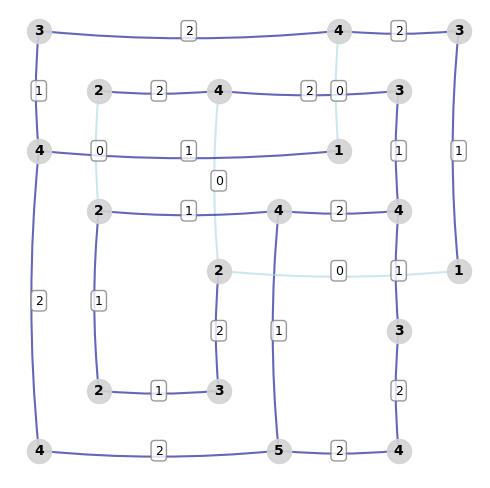

In [40]:


G = puzzle_to_graph(puzzle)
plot_graph(G)